## IMPORT THE RELEVANT MODULES

In [1519]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
plt.style.use('ggplot')
import datetime
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
#from nltk.corpus import stopwords
#from nltk.util import ngrams
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
#import nltk
#nltk.download('stopwords')
#stop = set(stopwords.words('english'))
import os
import json
#import eli5
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from pandas_profiling import ProfileReport
from ast import literal_eval
from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [1007]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

## IMPORT THE DATA

In [29]:
traindf = pd.read_csv('train.csv')

In [31]:
testdf = pd.read_csv('test.csv')

## MAKE A COPY

In [143]:
df = traindf.copy()

## EDA - INITIAL LOOK

In [144]:
# getting the number of columns and rows

df.shape

(3000, 23)

In [145]:
df.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [147]:
#finding null value

df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [148]:
# get a better overview

profile = ProfileReport(df, title ='Pandas Profiling Report')

profile.to_widgets()

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [149]:
# looking to identify any correlations

df.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.019732,-0.007470,0.010750,0.000610
budget,0.019732,1.000000,0.342356,0.238373,0.752965
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460
runtime,0.010750,0.238373,0.133690,1.000000,0.216380
revenue,0.000610,0.752965,0.461460,0.216380,1.000000


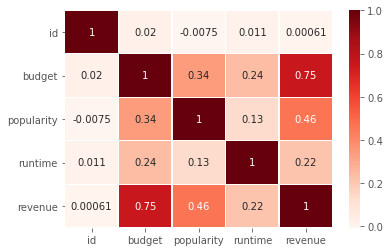

In [150]:
# let's see that in a heatmap
sns.heatmap(df.corr(), cmap='Reds', annot=True, linewidths = 0.2);


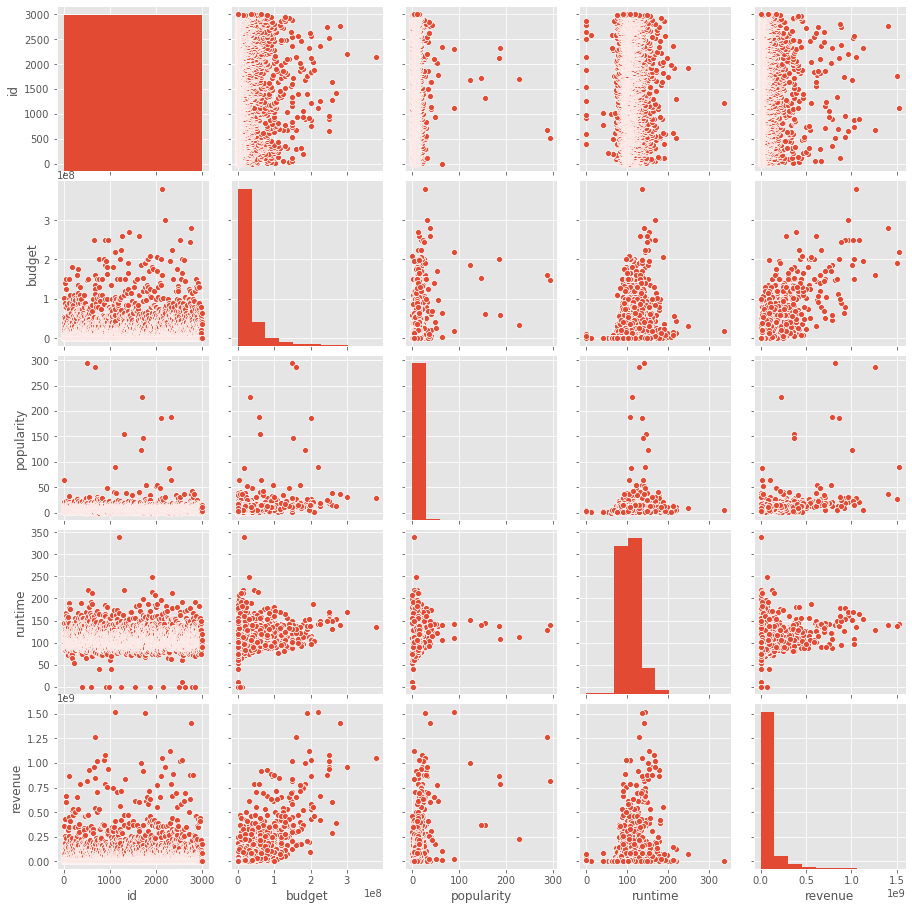

In [151]:
sns.pairplot(df);

It looks like budget and popularity are correlated with revenue, our label

Now, let's look at a histogram to see how these values are dispersed...

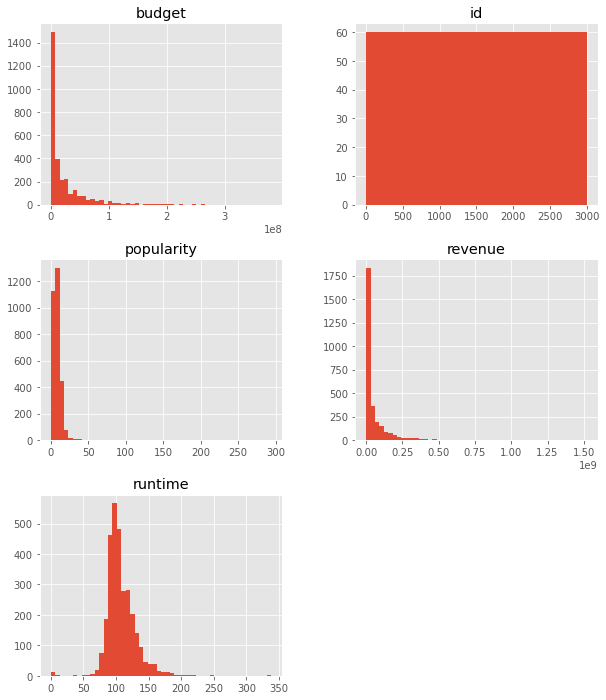

In [152]:

df.hist(bins=50, figsize=(10,12));

It looks as though budget and revenue have similar distributions, popularity as well, albeit to a lesser degree.

They look however heavily skewed.  From what I have read, linear models, and I will be using linear regression as a model, make more reliable predictions if the predictors and the target variable are normally distributed.  And a popular way of rectifing that is with a log transformation via numpy.

## EDA - MORE EXTENSIVE

First, let's look at these features more closely...

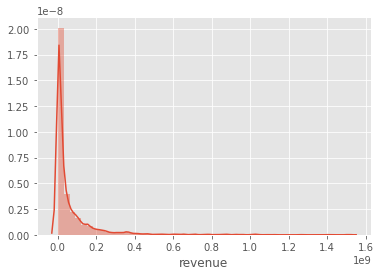

In [153]:
#looking at the revenue column more closely

sns.distplot(df['revenue']);

In [154]:
# check the skew
df['revenue'].skew()

4.542285301660683

As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed and will undergo the above mentioned log transformation.

In [157]:
df['log_revenue'] = np.log1p(df['revenue'])

In [158]:
# check the skew
# it's much better.  Not ideal, but better

df['log_revenue'].skew()

-1.6505359224818055

Let's plot these features side by side, but since we'll most likely do it for budget and popularity, we'll make a function to avoid repetiveness..

In [198]:
def distribution_subplotter(feature1,feature2):
    ax,fig = plt.subplots(figsize=(12,8));
    plt.subplot(1,2,1);
    plt.hist(df[feature1],bins=50);
    plt.title(f'{feature1} distribution');
    plt.subplot(1,2,2);
    plt.hist(df[feature2],bins=50);
    plt.title(f'{feature2} distribution');
    

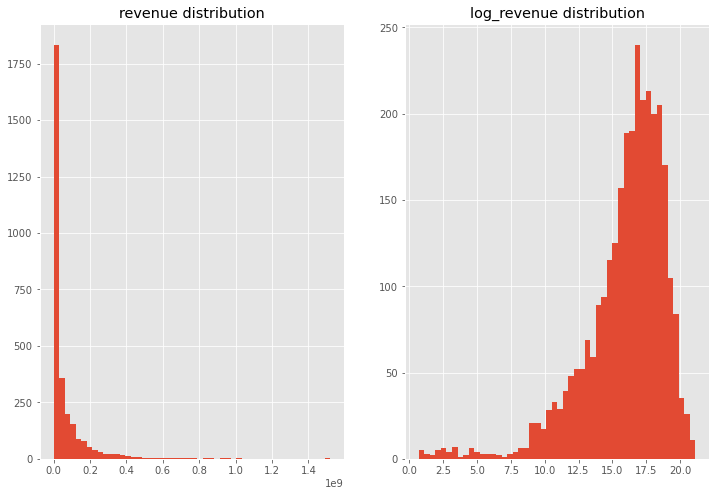

In [199]:
distribution_subplotter('revenue', 'log_revenue')

Way better distribution now.

#### Budget

The budget column is the most closely correlated feature with revenue.  We'll have to examine it closely, especially as it related to skew.

In [159]:
df['budget'].skew()

3.1035303484688876

In [161]:
#we'll do the same thing for budget that we did with revenue - log transform

df['log_budget'] = np.log1p(df['budget'])

In [167]:
df['log_budget'].skew()

-0.9000651667922802

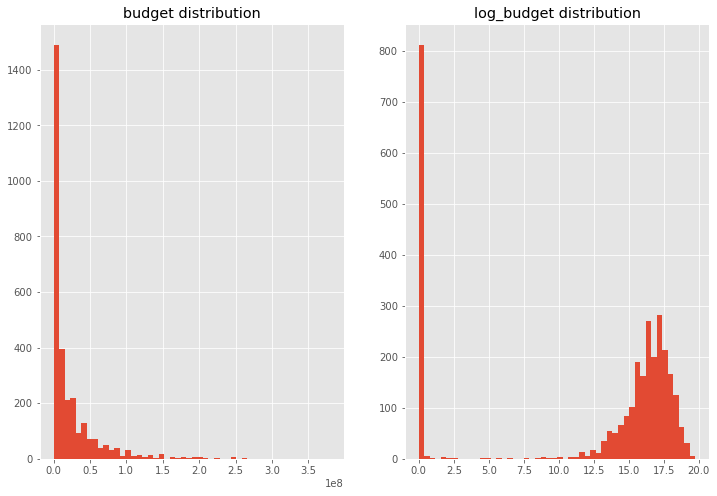

In [200]:
distribution_subplotter('budget','log_budget')

there are still a lot of zero values that need to be addresssed.  Leave them as zero or impute a value

But let's see how log_revenue and log_budget interact with each other...

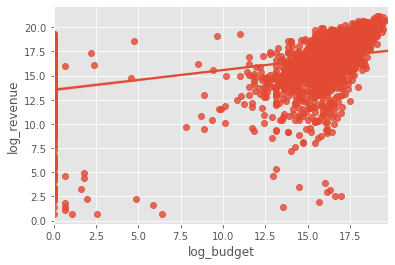

In [284]:
sns.regplot(df['log_budget'], df['log_revenue']);

#### popularity

In [180]:
df['popularity'].skew()

14.377406732929895

In [183]:
df['log_popularity'] = np.log1p(df['popularity'])

In [184]:
df['log_popularity'].skew()

-0.4238638236569478

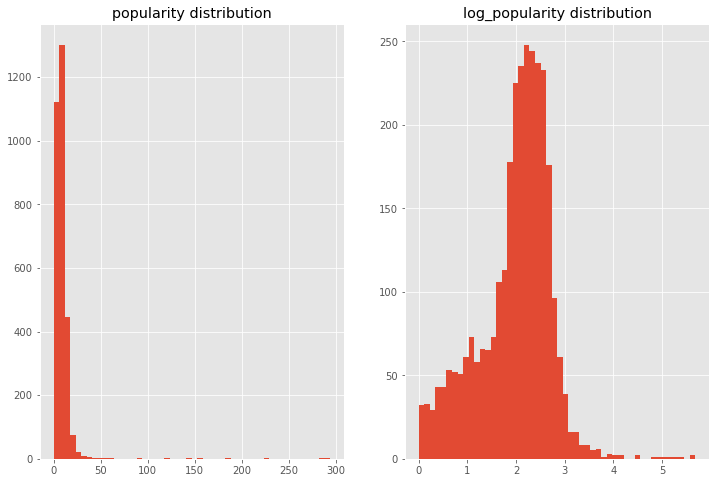

In [201]:
distribution_subplotter('popularity','log_popularity')

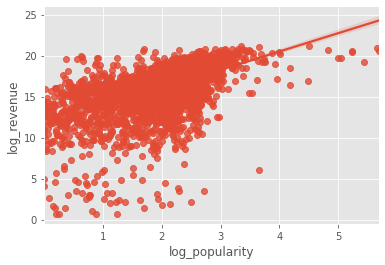

In [285]:
sns.regplot(df['log_popularity'], df['log_revenue']);

Given the coorelation factor is not as great with revenue as budget is, I might still use the original column\feature 

#### Belongs to Collection and Homepage

These two columns have a lot of null values, but I wanted to see if having a non null value impacts revenue in any way.  To show this I will make these columns binary and then plot them against revenue

In [188]:
df['has_homepage'] = df['homepage'].apply(lambda x: 1 if x != None and pd.isna(x)==False else 0)

In [189]:
# let's get a value counts
df['has_homepage'].value_counts()

0    2054
1     946
Name: has_homepage, dtype: int64

I still want to compare this value against the two revenue columns (revenue and log_revenue), just to see the different effect, if any they have.  I'm going to repeat this process for the collections column, so I'll make a function to do this...

In [273]:
def stripplot_comparer(feature1,feature2,feature3):

    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(12, 7)
 
    axes[0] = sns.stripplot(x=feature1, y=feature2, data=df, orient='v', ax=axes[0])
    axes[0].set_title(f'{feature2}')
    
    
    axes[1] = sns.stripplot(x=feature1, y=feature3, data=df, orient='v', ax=axes[1])
    axes[1].set_title(f'{feature3}')
  
    plt.tight_layout()

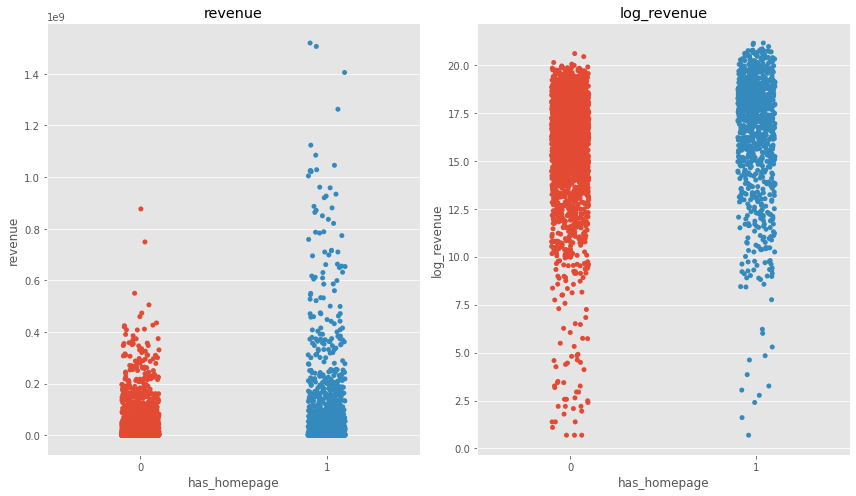

In [274]:
stripplot_comparer('has_homepage','revenue','log_revenue')

The results are much different here.  With log_revenue, it seems as though the feature will have a minimal impact on it.  

In [271]:
df['has_collection'] = df['belongs_to_collection'].apply(lambda x: 1 if x != None and pd.isna(x)==False else 0)

In [275]:
df['has_collection'].value_counts()

0    2396
1     604
Name: has_collection, dtype: int64

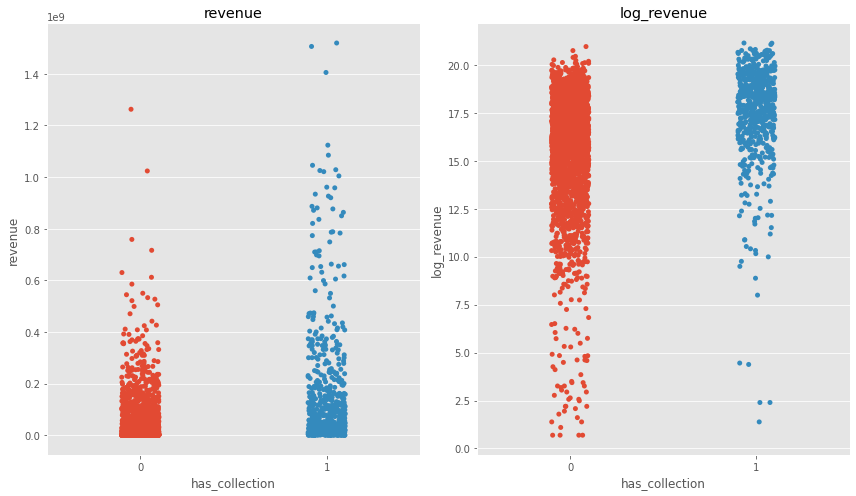

In [277]:
stripplot_comparer('has_collection','revenue', 'log_revenue')

I think in both instances, this feature ('has_collection') has little value on either revenue or log_revenue.

#### original language

let's look at revenue with respect to language... 

In [278]:
#confine it to the top ten original languages
data = df.loc[df['original_language'].isin(df['original_language'].value_counts()[:10].index)]

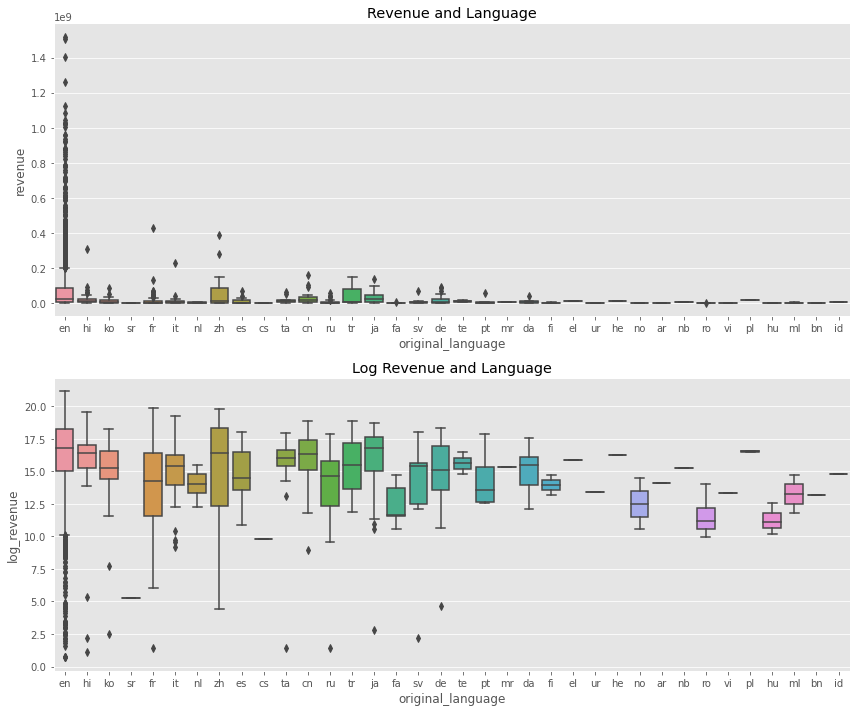

In [282]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(12, 10)
 
axes[0] = sns.boxplot(x='original_language', y='revenue', data=df, orient='v', ax=axes[0])
axes[0].set_title('Revenue and Language')
    
    
axes[1] = sns.boxplot(x='original_language', y='log_revenue', data=df, orient='v', ax=axes[1])
axes[1].set_title('Log Revenue and Language')
  
plt.tight_layout()

This will inquire some investigation and the issue of revenue v. log_revenue seems like it will affect the results.  I'd like to carry out this investigation further with some of the other features.

#### release date

we'll open up the release date to explore options like year, month and day to see how that impacts revenue

In [298]:
df['year'] = pd.to_datetime(df['release_date']).dt.year
df['month'] = pd.to_datetime(df['release_date']).dt.month
df['day'] = pd.to_datetime(df['release_date']).dt.day

In [300]:
df['day_of_week'] = pd.to_datetime(df['release_date']).dt.dayofweek

let's graph these.  But before we do, let's create some functions to avoid repetitive coding...

In [317]:
def count_plotter(feature):
    sns.countplot(df[feature])
    plt.title(f'{feature} Count');

In [360]:
def barplot_comparer(feature):

    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(12, 7)
 
    a = df.groupby(feature)['revenue'].aggregate([np.sum]).reset_index()
    axes[0] = sns.barplot(x=feature, y='sum', data=a, orient='v', ax=axes[0])
    axes[0].set_title(f'{feature} revenue')
    
    b = df.groupby(feature)['log_revenue'].aggregate([np.sum]).reset_index()
    axes[1] = sns.barplot(x=feature, y='sum', data=b, orient='v', ax=axes[1])
    axes[1].set_title(f'{feature} log_revenue')
  
    plt.tight_layout()

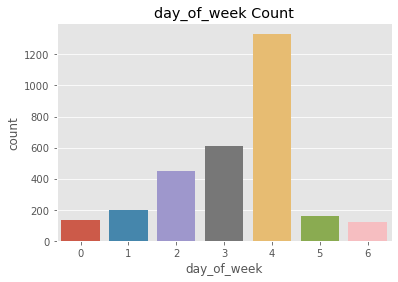

In [361]:
count_plotter('day_of_week')

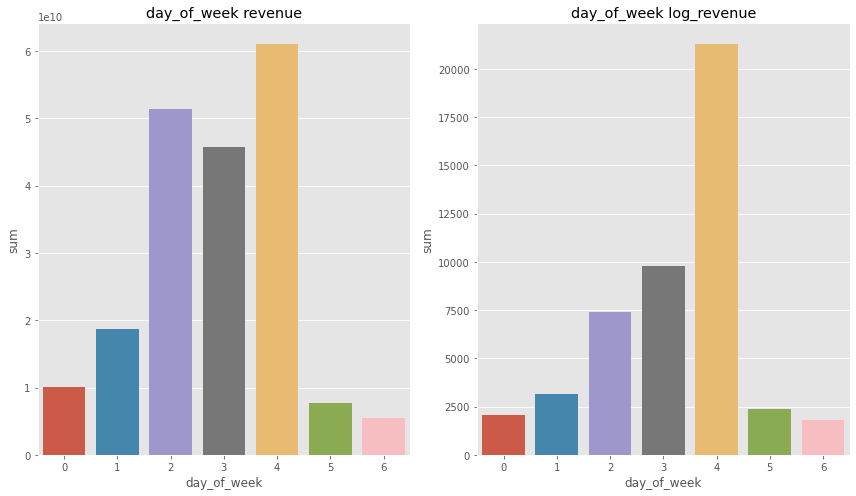

In [362]:
barplot_comparer('day_of_week')

note the difference in outcomes between revenue and log_revenue.  Let's do the same thing for month

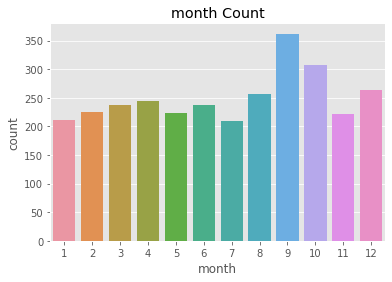

In [1526]:
count_plotter('month')
fig.savefig('figure.jpeg')

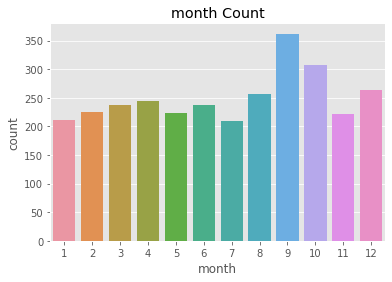

In [364]:
count_plotter('month')

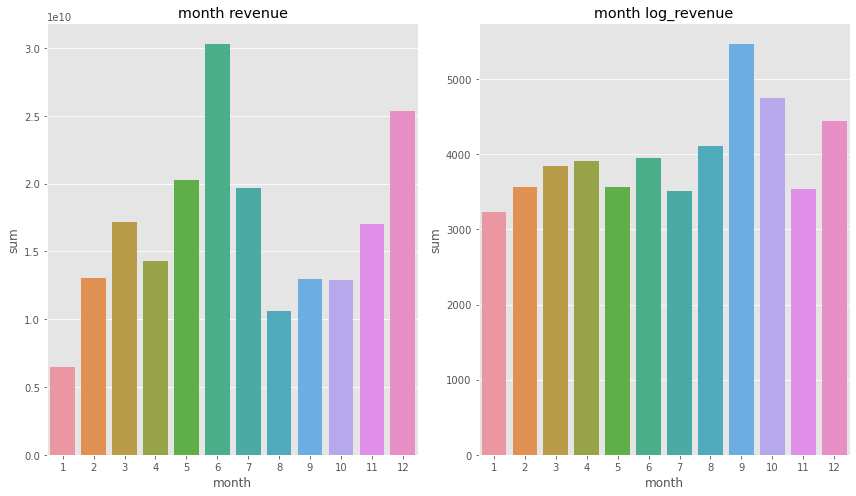

In [365]:
barplot_comparer('month')

Once again the difference between revenue and log_revenue is substantially different.

Here we will create a new feature.  Knowing that block buster movies are released during the summer box office season (May-August), we will create a column that denotes whether a film has been released during that time period...

In [350]:
df['summer'] = df['month'].apply(lambda x: 1 if 5 <= x <= 8 else 0)

In [390]:
summer = df.groupby('summer')['revenue'].aggregate([np.mean]).reset_index()

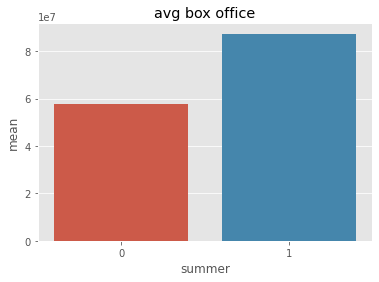

In [391]:
sns.barplot(x='summer', y='mean', data=summer);
plt.title('avg box office');

This seems to be a substantial difference. But when we look at log_revenue... 

In [392]:
summer_log = df.groupby('summer')['log_revenue'].aggregate([np.mean]).reset_index()

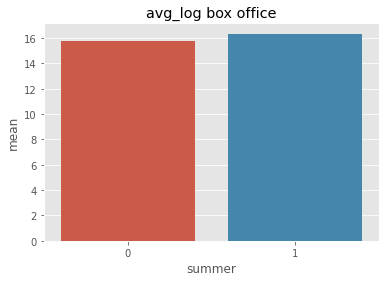

In [393]:
sns.barplot(x='summer', y='mean', data=summer_log);
plt.title('avg_log box office');

...it's a totally different story.

####  For now I will just continue with revenue, largely because I don't know what to make of the findings with log transformation

In [413]:
# let's try revenue
year_rev = df.loc[(df['year']<=2020)]

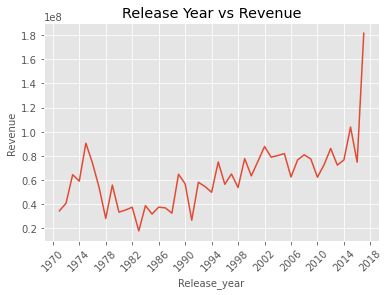

In [428]:
year_rev.groupby('year')['revenue'].mean().plot()
plt.xticks(np.arange(1970,2020,4),rotation=45);
plt.xlabel('Release_year',fontsize = 10);
plt.ylabel('Revenue',fontsize = 10);
plt.title("Release Year vs Revenue");

#### runtime

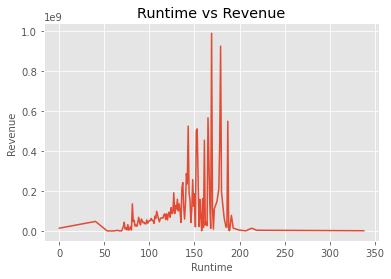

In [437]:
year_rev.groupby('runtime')['revenue'].mean().plot()
plt.xlabel('Runtime',fontsize = 10);
plt.ylabel('Revenue',fontsize = 10);
plt.title("Runtime vs Revenue");

looks like there is a sweet spot for higher revenue somewhere between 15-200 minutes.

### CONVERT JSON ITEMS TO LISTS

There are a number of columns that need to be converted so we can explore them better

In [439]:
import ast
dict_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

for col in dict_cols:
    df[col] = df[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [476]:
for col in dict_cols:
    df[col] = df[col].apply(lambda x: [d['name'] for d in x])

#### genres

here we are goingto create separate columns for each movie genre with their own count


In [490]:
df_enc = df['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
df_genres = pd.concat([df, df_enc], axis=1)
genres = df_enc.columns
df_genres.head(n=3)

<ipython-input-490-ff5bc5dc0337>:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,0,0,0,0,0,0
2,3,NaN,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,0,0,0,0


Next, we're going to make one dataframe with all the necessary info to explore genres, but first we'll need to get the info to compile it in 

In [496]:
# general_info
genres_info = []
for x in genres:
    total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity=0, 0, 0, 0, 0, 0
    total_movies = df_genres[df_genres[x]==1][x].count()
    total_revenue = df_genres[df_genres[x]==1]['revenue'].sum()
    median_revenue = df_genres[df_genres[x]==1]['revenue'].median()
    genres_info.append([x, total_movies, total_revenue, median_revenue])
    

In [498]:
# the df
genres_info = pd.DataFrame(genres_info, columns=['genres', 'movies_count', 'total_revenue', 'median_revenue'])
genres_info['total_revenue(million)'] = genres_info['total_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info['median_revenue(million)'] = genres_info['median_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info[['genres', 'movies_count', 'total_revenue(million)', 'median_revenue(million)']]

,genres,movies_count,total_revenue(million),median_revenue(million)
0,Comedy,1028,62580,18.0
1,Drama,1531,69516,11.0
2,Family,260,36113,57.0
3,Romance,571,30094,14.0
4,Thriller,789,53917,21.0
5,Action,741,82283,36.0
6,Animation,141,20830,36.0
7,Adventure,439,77180,59.0
8,Horror,301,15865,17.0
9,Documentary,87,403,0.0


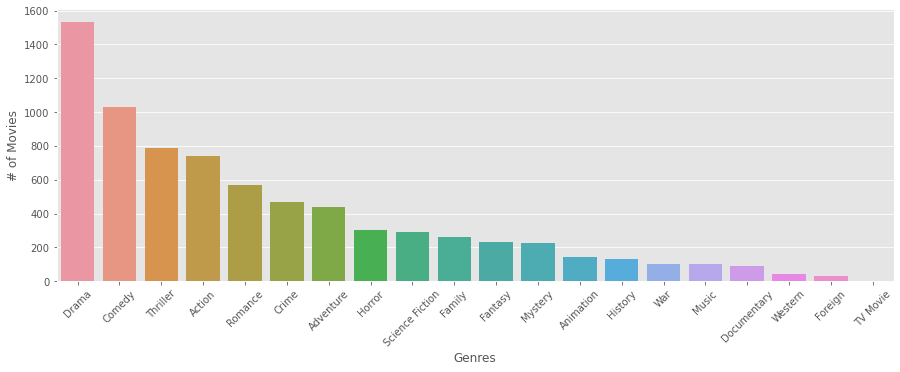

In [507]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='movies_count', data=genres_info, order=genres_info.sort_values('movies_count', ascending=False).genres)
plt.xticks(rotation=45)
plt.ylabel('# of Movies', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()


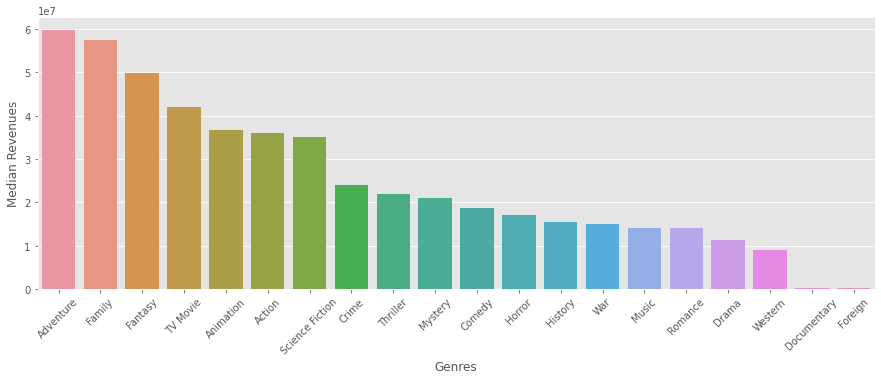

In [508]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='median_revenue', data=genres_info, order=genres_info.sort_values('median_revenue', ascending=False).genres)
plt.xticks(rotation=45)
plt.ylabel('Median Revenues', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

#### production companies

here we'll experiment with a little feature engineering.  Instead of listing the production companies, I thought it would be better to just count them for each row and see how that looked...

In [525]:
df['num_pro_cos'] = df_genres['production_companies'].apply(lambda x: len(x))

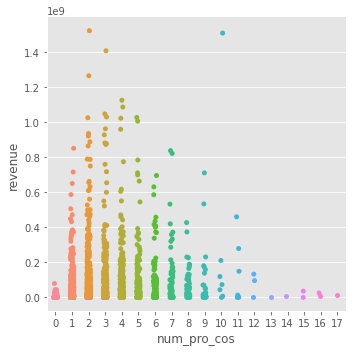

In [527]:
# let's do a catplot
sns.catplot(x='num_pro_cos', y='revenue', data=df);

looks like there is a sweet spot somewhere around 2-4?

In [531]:
#### production countries

In [530]:
# let's take a look at the top ten
df_genres['production_countries'].value_counts().head(10)

[United States of America]                    1752
[United Kingdom, United States of America]     118
[United Kingdom]                                94
[India]                                         69
[]                                              55
[France]                                        51
[Canada, United States of America]              48
[Germany, United States of America]             47
[Russia]                                        46
[Japan]                                         31
Name: production_countries, dtype: int64

In [554]:
# will need to make it into a string first
df_genres['production_countries'] = df_genres['production_countries'].apply(lambda x: ', '.join(x))

In [558]:
# let's see how the top ten does with revenue


data = df_genres[df_genres['production_countries'].\
        isin(df_genres['production_countries'].\
        value_counts()[:10].index)]  



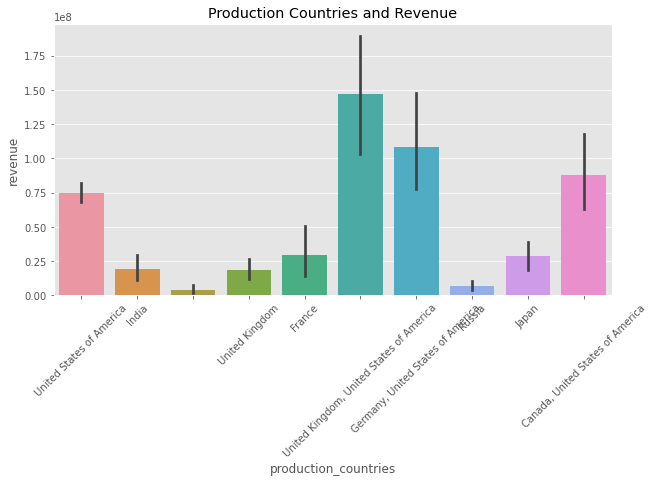

In [568]:
plt.figure(figsize=(10,5));
sns.barplot(x='production_countries', y='revenue', data=data, orient='v')
plt.xticks(rotation=45);
plt.title('Production Countries and Revenue');

US production companies have a hand in all the money making movies.  Maybe this can be made into a binary feature - US involved or Not - but it seems even the US does better when involved with another country.

####  tagline, overview, title, keywords 

we'll see what words feature most prominently in these features.  Given that we will repeat the same process of each feature, we'll make a quick function....

In [570]:
def wordcloud_maker(feature):
    text = df[feature].values 

    wordcloud = WordCloud().generate(str(text))
    plt.figure(figsize = (12, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    

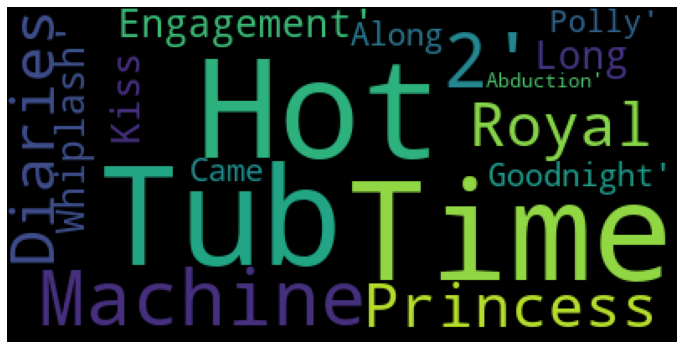

In [573]:
wordcloud_maker('title')

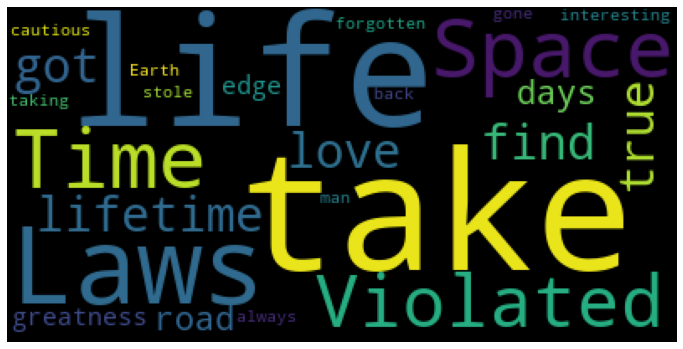

In [571]:
wordcloud_maker('tagline')

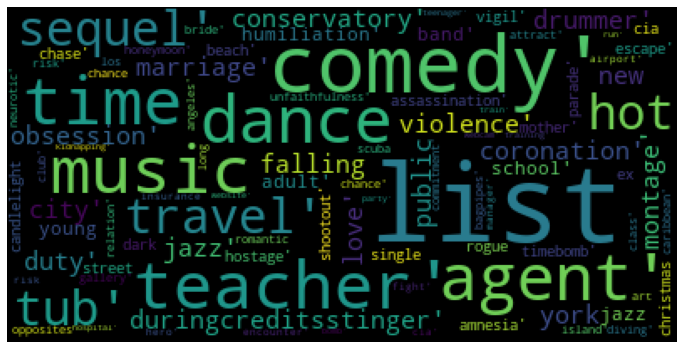

In [574]:
wordcloud_maker('Keywords')

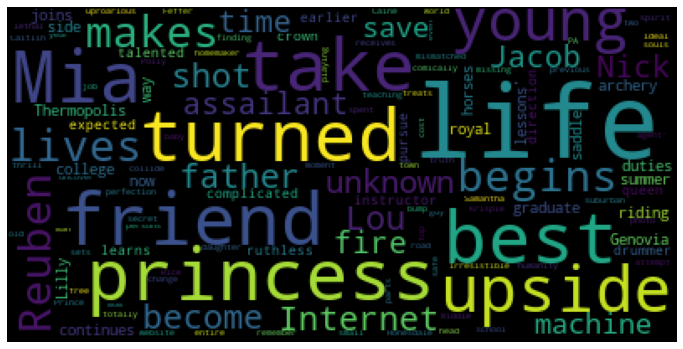

In [572]:
wordcloud_maker('overview')

#### Cast and Crew

For Cast, we will extract the actors and then count which actors appear most frequently and make those actors columns.  For crew, we will extract the director and then implement Tdif to obtain a value score.  We will do that however, when we prepare everything for the modelling with custom transformers.

Let's look at the correlations one more time before we begin the processing, feature engineering etc...

In [598]:
corr_matrix = df_genres.corr()
corr_matrix['revenue'].sort_values(ascending=False)

revenue            1.000000
budget             0.752965
log_revenue        0.501663
popularity         0.461460
log_popularity     0.435035
has_collection     0.339425
Adventure          0.328439
log_budget         0.325925
has_homepage       0.263179
runtime            0.216380
Action             0.184584
Fantasy            0.171040
Family             0.161677
Science Fiction    0.132367
Animation          0.130828
summer             0.100078
day                0.045699
month              0.020164
year               0.012325
Thriller           0.006998
id                 0.000610
TV Movie          -0.003283
Western           -0.013466
Mystery           -0.014686
Crime             -0.022648
War               -0.022701
Comedy            -0.030717
Music             -0.032214
Horror            -0.034041
History           -0.044172
Foreign           -0.048191
Romance           -0.049436
Documentary       -0.078030
day_of_week       -0.140494
Drama             -0.158280
Name: revenue, dtype

## PROCESSING/FEATURE ENGINEERING 

Here we will make a number of custom transformers so we can process the data as well as create new features

In [1360]:
### Create a custom transformer that drops features we wont be using

class DropFeaturesTransformer(BaseEstimator, TransformerMixin):
    '''
    Drop unwanted features
    '''
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            return X.drop(self.features, axis=1)
        except Exception as ex:
            print("Drop features transformer error:", ex)

In [1357]:
#see if it checks out
dropped = DropFeaturesTransformer('id')
drop = dropped.transform(train)
drop.head(1)
# it does

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,tagline,title,Keywords,cast,crew,revenue,year,month,day_of_week,summer
0,1,14000000,[Comedy],0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...",72,12314651,2015,2,4,0


We'll need a transformer to extract the relevant info from columns that are json...

In [637]:
### Create a transformer that makes the json items accessible

class JsonExtractor(BaseEstimator, TransformerMixin):
    '''
    Make the colums in JSON extractable
    '''
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            for column in self.features:
                X[column] = X[column].apply(lambda x: {} if pd.isna(x) else literal_eval(x))
                X[column] = X[column].apply(lambda x:[d['name'] for d in x])
            return X
        except Exception as ex:
            print('Json extractor error:', ex)
    

In [638]:
# check that it works
dict_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']
result1 = JsonExtractor(dict_cols)


In [639]:
res1 = result1.transform(train)

In [641]:
res1.head(3)
# checks out

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435
2,3,NaN,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000


We want a custom transformer that turns several features into binary values...

In [643]:
class BinaryTransformer(BaseEstimator, TransformerMixin):
    '''
    Transforms features into binary ones
    '''
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            for column in self.features:
                X[column] = X[column].apply(lambda x: 1 if x != None and pd.isna(x) == False else 0)
        except Exception as ex:
            print("Binary transformer error:", ex)
        return X

In [646]:
# check that it works
binary_cols = ['belongs_to_collection', 'homepage']
result2 = BinaryTransformer(binary_cols)

In [647]:
#res2 = result2.transform(train)
res2.head(3) 
#checks out

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,1,14000000,[Comedy],0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",0,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435
2,3,0,3300000,[Drama],1,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000


In [663]:
class DateTransformer(BaseEstimator, TransformerMixin):
    
    '''
    will pass the release_date only, so there is no need to pass an init
    this transformer will take that feautre and make four new ones
    '''
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            X['year'] = pd.to_datetime(X['release_date']).dt.year
            X['month'] = pd.to_datetime(X['release_date']).dt.month
            X['day_of_week'] = pd.to_datetime(df['release_date']).dt.dayofweek
            X['summer'] = df['month'].apply(lambda x: 1 if 5 <= x <= 8 else 0)
            X = X.drop('release_date', axis=1)
        except Exception as ex:
            print("Date transformer error:", ex)
        return X
    

In [664]:
#check it
#result3 = DateTransformer()

In [665]:
#res3 = result3.transform(train)
res3.head(3)
#it checks out

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,Keywords,cast,crew,revenue,year,month,day_of_week,summer
0,1,1,14000000,[Comedy],0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,2015,2,4,0
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",0,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,2004,8,4,1
2,3,0,3300000,[Drama],1,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,2014,10,4,0


In [674]:
class GenresTransformer(BaseEstimator, TransformerMixin):
    '''
    make each genre it's own column
    '''
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            X_enc = X['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
            X = pd.concat([X, X_enc], axis=1)
            genres = X_enc.columns
            
        except Exception as ex:
            print("Genre transformer error:", ex)
        return X



In [675]:
# check it out
#result4 = GenresTransformer()
#res4 = result4.transform(train)
res4.head(3)
# it checks out

<ipython-input-674-83969739f085>:11: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
0,1,1,14000000,[Comedy],0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,0,0,0,0
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",0,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,0,0,0,0,0,0
2,3,0,3300000,[Drama],1,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,0,0,0,0


In [678]:
class LengthExtractor(BaseEstimator, TransformerMixin):
    '''
    will extract the length from crew and production company features
    '''
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            for column in self.features:
                X[column] = X[column].apply(lambda x: len(x))
        except Exception as ex:
            print("Length extractor transformer error:", ex)
        return X
    

In [682]:
# check it out...
#result5 = LengthExtractor(['production_companies','crew', 'cast', 'spoken_languages'])
#res5 = result5.transform(train)
res5.head(3)
# ...it checks out

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,Keywords,cast,crew,revenue,year,month,day_of_week,summer
0,1,1,14000000,[Comedy],0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...",72,12314651,2015,2,4,0
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",0,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",9,95149435,2004,8,4,1
2,3,0,3300000,[Drama],1,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...",64,13092000,2014,10,4,0


In [863]:
actorsdf = train.copy()

#### Will attempt to get a list of the 15 most listed actors and then append them to the dataframe as columns

In [864]:
#if data is your list of lists or dataframe
import itertools
import collections

# lol.  this is the work of that wonderful, wonderfull, life saving site...
# stackoverflow

data = [list(set(i)) for i in df_genres['cast']]
newData = list(itertools.chain.from_iterable(data))
dictVal = collections.Counter(newData)


In [865]:
#narrow the list to 15
top15_actors = dictVal.most_common()[:15]

In [866]:
#create the dataframe
df_actors = pd.DataFrame(top15_actors)

In [867]:
df_actors[1]=0

In [868]:
# transpose it
df_actors = df_actors.T

In [869]:
new_header = df_actors.iloc[0] #grab the first row for the header
df_actors = df_actors[1:] #take the data less the header row
df_actors.columns = new_header 

In [870]:
# all set...
df_actors

,Samuel L. Jackson,Robert De Niro,Morgan Freeman,J.K. Simmons,Bruce Willis,Liam Neeson,Susan Sarandon,Bruce McGill,John Turturro,Forest Whitaker,Willem Dafoe,Bill Murray,Owen Wilson,Nicolas Cage,Sylvester Stallone
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [871]:

class CastTransformer(BaseEstimator, TransformerMixin):
    #the constructor
    '''
    potentially setting hyperparameters 
    '''
    def __init__(self, df_actors):
        self.df_actors = df_actors
    #estimator method
    def fit(self, X, y = None):
        return self
    #transformation
    def transform(self, X, y = None):
        X['actors']= X['cast'].fillna("")
        actors_list = []
        for index, row in X.iterrows():
            data=row['actors']
            dict_actors={}
        
            for actor in df_actors.columns: 
                if actor in data :
                    dict_actors[actor]=1
                else:
                    dict_actors[actor]=0

            actors_list.append(dict_actors)
        df_actors1=pd.DataFrame(actors_list)
        df_actors1 = df_actors1.fillna(0)
        return pd.concat([X,df_actors1], axis=1)


In [872]:
# check it out...
result6 = CastTransformer('df_actors')
res6 = result6.transform(actorsdf)
res6.tail(10)
# ...it checks out

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Liam Neeson,Susan Sarandon,Bruce McGill,John Turturro,Forest Whitaker,Willem Dafoe,Bill Murray,Owen Wilson,Nicolas Cage,Sylvester Stallone
2990,2991,0,0,"[Action, Comedy]",0,tt0118663,en,B.A.P.S.,Can two clueless Georgia homegirls with big he...,1.560980,...,0,0,0,0,0,0,0,0,0,0
2991,2992,1,13000000,"[Drama, Family, Romance, Music]",0,tt0206275,en,Save the Last Dance,"A white midwestern girl moves to Chicago, wher...",4.794088,...,0,0,0,0,0,0,0,0,0,0
2992,2993,0,1135654,"[Action, Adventure, Drama, Family, Fantasy]",0,tt0015400,en,The Thief of Bagdad,A recalcitrant thief vies with a duplicitous M...,3.878515,...,0,0,0,0,0,0,0,0,0,0
2993,2994,0,60000000,"[Comedy, Drama]",1,tt0362227,en,The Terminal,Viktor Navorski is a man without a country; hi...,14.092373,...,0,0,0,0,0,0,0,0,0,0
2994,2995,0,0,[Drama],0,tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,...,0,0,0,0,0,0,0,0,0,0
2995,2996,0,0,"[Comedy, Romance]",0,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,0,0,0,0,0,0,0,0,0,0
2996,2997,0,0,"[Drama, Music]",0,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,0,0,0,0,0,0,0,0,0,0
2997,2998,0,65000000,"[Crime, Action, Mystery, Thriller]",0,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,0,0,0,0,0,0,0,0,0,0
2998,2999,0,42000000,"[Comedy, Romance]",1,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,0,0,0,0,0,0,0,0,0,0
2999,3000,0,35000000,"[Thriller, Action, Mystery]",1,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,0,0,0,0,0,0,0,0,0,0


In [1072]:
class Imputer(BaseEstimator, TransformerMixin):
    '''
    will impute mean value if value = 0 
    '''
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            for column in self.features:
                X[column] = X[column].fillna(0)
                X[column] = X[column].apply(lambda x: X[column].mean() if x==0 else x)
        except Exception as ex:
            print("Imputer transformer error:", ex)
        return X
    

In [848]:
class NumericFilter(BaseEstimator, TransformerMixin):
    
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        return X.select_dtypes(include=numerics)        

### PREPARE THE DATA FRAME FOR MODELLING

Granted, I could have prepared the df at each successive step above, but I wanted to solidify my understanding and use of pipelines.

In [1358]:
# making a copy just to run a test case

train1 = traindf.copy()

In [1361]:
# process the data through a pipeline

drop_cols = ['id']
dict_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'crew']
binary_cols = ['belongs_to_collection', 'homepage']
length_cols = ['production_companies','crew', 'spoken_languages']
imp_cols = ['budget','runtime']

processing_pipeline = Pipeline(
    [
        ("dropfeatures", DropFeaturesTransformer(drop_cols)),
        ("jsonextractor", JsonExtractor(dict_cols)),
        ("binary", BinaryTransformer(binary_cols)),
        ("datatransformer", DateTransformer()),
        ("genres", GenresTransformer()),
        ("lengthextractor", LengthExtractor(length_cols)),
        ('casttransformer', CastTransformer(df_actors)),
        ('imputer', Imputer(imp_cols)),
        ('numericfilter', NumericFilter()),
      
           
    ]
)


In [1362]:
train1 = processing_pipeline.fit_transform(train1)

<ipython-input-674-83969739f085>:11: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [1363]:
# the df is now prepared

train1.head()

,belongs_to_collection,budget,homepage,popularity,production_companies,runtime,spoken_languages,crew,revenue,year,...,Liam Neeson,Susan Sarandon,Bruce McGill,John Turturro,Forest Whitaker,Willem Dafoe,Bill Murray,Owen Wilson,Nicolas Cage,Sylvester Stallone
0,1,14000000.00,0,6.575393,3,93.0,1,72,12314651,2015,...,0,0,0,0,0,0,0,0,0,0
1,1,40000000.00,0,8.248895,1,113.0,1,9,95149435,2004,...,0,0,0,0,0,0,0,0,0,0
2,0,3300000.00,1,64.299990,3,105.0,1,64,13092000,2014,...,0,0,0,0,0,0,0,0,0,0
3,0,1200000.00,1,3.174936,0,122.0,2,3,16000000,2012,...,0,0,0,0,0,0,0,0,0,0
4,0,22531334.11,0,1.148070,0,118.0,1,2,3923970,2009,...,0,0,0,0,0,0,0,0,0,0


### Prepare Train Test Split

In [1364]:
X = train1.drop(columns=['revenue'])
y = train1['revenue']

### Train Test Split

In [1369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MODELING

We'll try out a number of baseline models to see what gives us a better score.  We will also run a cross_val_score to see how stable the model is behaving.

### Linear Regression

In [1376]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

scores = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring ='r2')
scores

array([0.63733843, 0.64301648, 0.58207926, 0.63160166, 0.68194545])

Let's see how it does against a final predict to see if it's overfitting or not..

In [1377]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

#### R2

In [1383]:
final_pred = lr_pipeline.predict(X_test)
print("R Square: ", r2_score(y_test, final_pred))

R Square:  0.6558110873999459


Let's plot the coefficients and see how the features are performing...

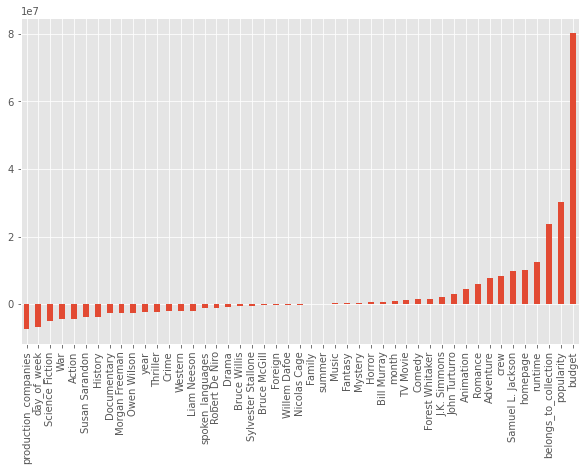

In [1387]:
plt.figure(figsize=(10,6))
pd.Series(lr_pipeline[1].coef_, index=X.columns).sort_values().plot(kind=
                                                          'bar');

#### RMSE
There are issues with putting the rmse in the cross val score for whatever reason so we'll just call without it.

In [1528]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
final_pred = lr_pipeline.predict(X_test)
print(mean_squared_error(y_test, final_pred))

5789221667818616.0


In [1529]:
5789221667818616.0**2

3.351508751914056e+31

#### Initial Thoughs:
The model performs adequately.  It's not a great score, but not a bust either.  Some features can be dispensed with.  If Linear Regression provides the best score, then I'll play with the features.  Until then, on to the next estimator....

### RandomForestRegressor

In [1388]:
# need to scale the data
# will put it in a pipeline with an estimator

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring ='r2')
scores

array([0.68425507, 0.71541496, 0.61091349, 0.71812277, 0.73160486])

In [1389]:
scores.mean()

0.6920622298825034

#### R2

In [1390]:
rf_pipeline.fit(X_train, y_train)
final_pred = rf_pipeline.predict(X_test)
print("R Square: ", r2_score(y_test, final_pred))

R Square:  0.7118299058353066


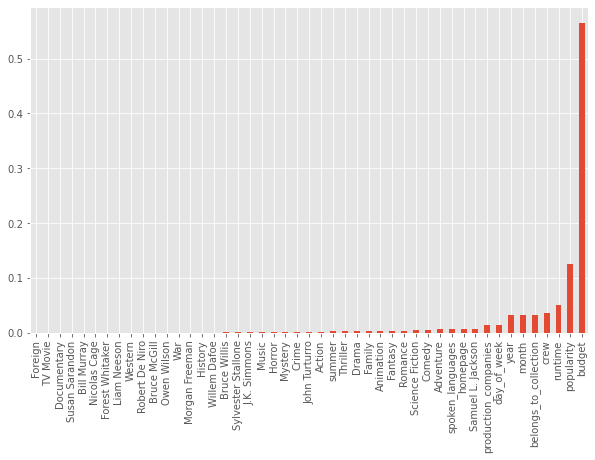

In [1393]:
plt.figure(figsize=(10,6))
pd.Series(rf_pipeline[1].feature_importances_, index=X.columns).sort_values().plot(kind=
                                                          'bar');

#### RMSE

In [1534]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])

rf_pipeline.fit(X_train, y_train)
final_pred = rf_pipeline.predict(X_test)
mse = mean_squared_error(y_test, final_pred)
rmse = mse**2
rmse

2.340720205186785e+31

#### Initial Thoughts:
Random Forest outperforms Linear Regresssion.  The commonalities in terms of feature importance remains budget, popularity and runtime.

### XGBoost

In [1396]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor() )
])

scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=5, scoring ='r2')
scores

array([0.66510523, 0.72032692, 0.528343  , 0.68914959, 0.6957742 ])

In [1397]:
scores.mean()

0.6597397864586965

#### R2

In [1399]:
xgb_pipeline.fit(X_train, y_train)
final_pred = xgb_pipeline.predict(X_test)
print("R Square: ", r2_score(y_test, final_pred))

R Square:  0.6988408430728367


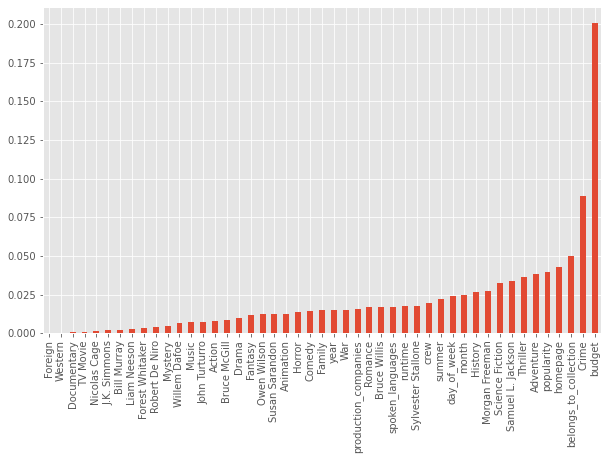

In [1400]:
# model interpretation
plt.figure(figsize=(10,6))
pd.Series(xgb_pipeline[1].feature_importances_, index=X.columns).sort_values().plot(kind=
                                                          'bar');

#### RMSE

In [1535]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor())
])

xgb_pipeline.fit(X_train, y_train)
final_pred = xgb_pipeline.predict(X_test)
mse = mean_squared_error(y_test, final_pred)
rmse = mse**2
rmse

2.565894233546158e+31

### Initial Thoughts:
This model performed better the Linear, and not quite as good as RGR, but I still might use a grid search on it and compare it against the latter because the scores were pretty close.  Budget, popularity, belongs_to_collection and homepage are still very much influencing the model.

## HYPERTUNING - RANDOM FOREST

We'll run this several times...

In [1536]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])


parameters = [
   {'rf__n_estimators': [40,50],
    #'rf__n_estimators': [10, 50, 100],
    #'rf__max_features': [5, 10, 20]
    'rf__max_features': [15, 20, 25]}
  ]

gcv = GridSearchCV(rf_pipeline, param_grid=parameters, cv=5, scoring='r2')
gcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'rf__max_features': [15, 20, 25],
                          'rf__n_estimators': [40, 50]}],
             scoring='r2')

In [1537]:
gcv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=20, n_estimators=50,
                                       random_state=42))])

In [1410]:
# best r2 score
best_model = gcv.best_estimator_
final_pred = best_model.predict(X_test)
print(r2_score(y_test, final_pred))

0.7343037305303111


In [1539]:
# rmse
best_model = gcv.best_estimator_
final_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, final_pred)
rmse = mse**2
rmse

1.9971814275828477e+31

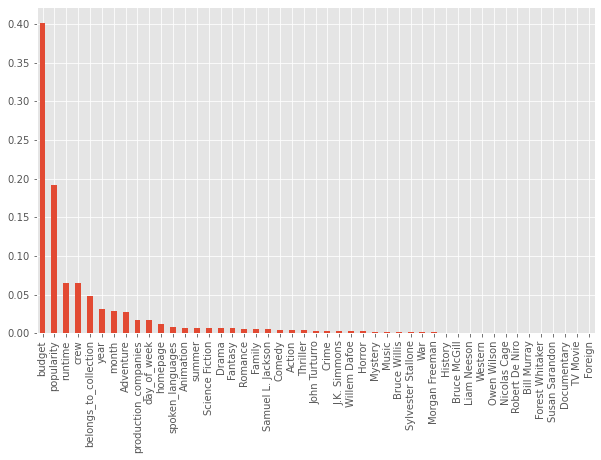

In [1416]:
#model interpretation
plt.figure(figsize=(10,6))
pd.Series(gcv.best_estimator_['rf'].feature_importances_, index=X_test.columns).sort_values(ascending=False).plot(kind=
                                                          'bar');

Can stand to eliminate a whole range of features here.  And we increased the score with gridsearch.  Let's see what we can do with XGBoost...

## HYPERTUNING - XGBoost

In [1427]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor() )
])

parameters = [
   {'xgb__n_estimators': [10, 25, 50],
    #'xgb__n_estimators': [10, 50, 100],
    #'xgb__max_features': [5, 10, 20],
    #'xgb__learning_rate': [0.01,1],
    
    'xgb__max_features': [15, 20, 25]}
  ]

gcv = GridSearchCV(xgb_pipeline, param_grid=parameters, cv=5, scoring='r2')
gcv.fit(X_train, y_train)

[22:24:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:24:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:24:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_16197

[22:24:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:24:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:24:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_16197

[22:24:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:24:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:24:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_16197

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     gamma=None, gpu_id=None,
                                                     importance_type='gain',
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                             

In [1428]:
gcv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, max_features=15, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=25, n_jobs=4, num_parallel_tree=1,
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [1429]:
# best r2 score
best_model = gcv.best_estimator_
final_pred = best_model.predict(X_test)
print(r2_score(y_test, final_pred))

0.7152374763633893


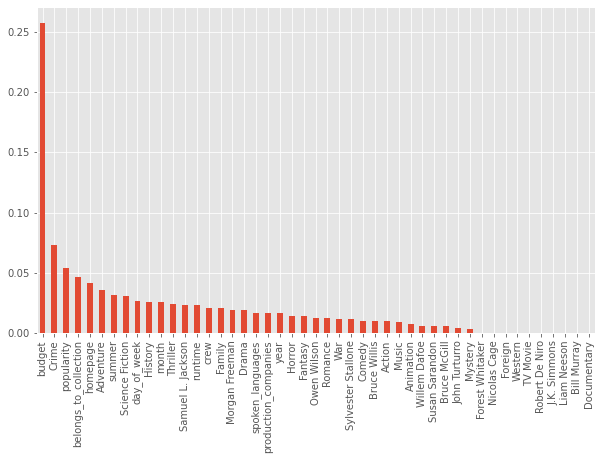

In [1430]:
# model interpretation
plt.figure(figsize=(10,6))
pd.Series(gcv.best_estimator_['xgb'].feature_importances_, index=X_test.columns).sort_values(ascending=False).plot(kind=
                                                          'bar');

In [1540]:
# this model wont have as good an rsme score as the RFG

#### Initial Thougths
After applying the gridsearch we once again managed to increase the score, but the RFR still scores the best.  

### BEST MODEL - Random Forest Regressor

## MODEL STACKING

Before proceeding to Stacking we will scale the data outside of the pipeline, as as not to complicate the pipelines with standard scaler..

In [1450]:
scaler = StandardScaler()
sc = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform (X_test)

In [1455]:
estimators = [
    ('lr1', LinearRegression()),
    ('xgb1',XGBRegressor(n_estimators=50)),
    ('rf1', RandomForestRegressor(max_features=15)),
    ('xgb2',XGBRegressor(n_estimators=100))
 
     ]

clf = StackingRegressor(
    estimators=estimators, final_estimator=RandomForestRegressor()
)

clf.fit(X_train_scaled, y_train)

StackingRegressor(estimators=[('lr1', LinearRegression()),
                              ('xgb1',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_cons...
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                           

In [1456]:
final_pred = clf.predict(X_test_scaled)
print("R Square: ", r2_score(y_test, final_pred))

R Square:  0.6944766177621253


#### Initial Thouhts:
It seems the Hypertuned RFR performs better.  Let's see if we can't hypertune these parameters better via GridSearch...

## HYPERTUNING STACKING REGRESSOR

In [1468]:
estimators = [
    ('lr1', LinearRegression()),
    ('xgb1',XGBRegressor()),
    ('rf1', RandomForestRegressor())
    
 ]

clf = StackingRegressor(
    estimators=estimators, final_estimator=RandomForestRegressor()
)

params = {'rf1__n_estimators': [10,50]
          #'rf1_max_features': [15,20],
         #'xgb1__n_estimators': [10, 25, 50]
         }

gcv = GridSearchCV(clf, param_grid=params, cv=5, verbose=-1)
gcv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=StackingRegressor(estimators=[('lr1',
                                                      LinearRegression()),
                                                     ('xgb1',
                                                      XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   gamma=None,
                                                                   gpu_id=None,
                                                                   importance_type='gain',
                                                                   interaction_constraints=None,


In [1469]:
gcv.best_estimator_

StackingRegressor(estimators=[('lr1', LinearRegression()),
                              ('xgb1',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                   

In [1471]:
best_model = gcv.best_estimator_
final_pred = best_model.predict(X_test_scaled)
print(r2_score(y_test, final_pred))

0.6104552195840325


#### Initial Thoughts
Admittedly, this was poor hypertuning and a poor score.  There seems to be something amiss with the parameters. Regardless, the purpose was to try and see if the stacking regressor could be applied to gridsearch.  Let's see what a neural network can do...

## NEURAL NETWORK

In [1508]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(500 , activation="relu", input_shape=X_train_scaled.shape[1:]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(X_train_scaled.shape[1], activation="relu"))
model.add(keras.layers.Dense(1))


model.compile(loss="mean_squared_logarithmic_error", optimizer=keras.optimizers.SGD(lr=1e-1))
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=35, validation_split=0.2)

Epoch 1/50
55/55 [==============================] - 1s 6ms/step - loss: 56.3946 - val_loss: 10.0517
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 9.6493 - val_loss: 7.8027
Epoch 3/50
55/55 [==============================] - 0s 4ms/step - loss: 7.8645 - val_loss: 7.0286
Epoch 4/50
55/55 [==============================] - 0s 3ms/step - loss: 7.3726 - val_loss: 6.5727
Epoch 5/50
55/55 [==============================] - 0s 3ms/step - loss: 6.4146 - val_loss: 6.2773
Epoch 6/50
55/55 [==============================] - 0s 3ms/step - loss: 6.9667 - val_loss: 6.0398
Epoch 7/50
55/55 [==============================] - 0s 3ms/step - loss: 6.2749 - val_loss: 5.9606
Epoch 8/50
55/55 [==============================] - 0s 3ms/step - loss: 5.9014 - val_loss: 5.8831
Epoch 9/50
55/55 [==============================] - 0s 3ms/step - loss: 5.5057 - val_loss: 5.8309
Epoch 10/50
55/55 [==============================] - 0s 3ms/step - loss: 5.3066 - val_loss: 5.7658
Epoch 11/50
55/55

In [1509]:
model.evaluate(X_test_scaled, y_test)

19/19 [==============================] - 0s 1ms/step - loss: 5.9321


5.932082176208496

In [1521]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(500 , activation="relu", input_shape=X_train_scaled.shape[1:]))
model.add(keras.layers.Dense(250, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(1))


model.compile(loss="mean_squared_logarithmic_error", optimizer='sgd')
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
60/60 [==============================] - 1s 6ms/step - loss: 144.8798 - val_loss: 56.8086
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 48.8850 - val_loss: 38.5934
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 34.6944 - val_loss: 30.2341
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 27.9328 - val_loss: 25.2630
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 23.4149 - val_loss: 21.9398
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 21.0294 - val_loss: 19.5481
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 18.5664 - val_loss: 17.7437
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 16.6577 - val_loss: 16.3358
Epoch 9/100
60/60 [==============================] - 0s 7ms/step - loss: 16.4783 - val_loss: 15.2062
Epoch 10/100
60/60 [==============================] - 0s 4ms/step - loss: 14.6677 - val_lo

In [1522]:
model.evaluate(X_test_scaled, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 6.2117


6.2116618156433105

### Initial Thoughts
I had difficulty with this one.  I could not get my r2 metric to run.  I'm not sure why.  And the only loss parameter that worked well is "mean_squared_logarithmic_error.  I tried a good deal of permutations, but this one was still very much in line with the validation scores.

### FINAL THOUGHTS
Much remains to be done both around feature selection and implementing another metric, namely the RSME.  Going forward I would like to implement the original language feature in the next iteration as well as drop several columns.  The columns I will not be dropping however are budget, popularity and runtime.  They proved to be highly influencial features across all models.  And finally, I did manage to get a fairly good score with Random Forest Regressor.